In [1]:
import numpy as np                       #numpy enables functions for data arrays
import matplotlib.pyplot as plt 
import math

In [2]:
sun = np.loadtxt('sun.txt')
wavelength = sun[:,0]
intensity = sun[:,1]

In [3]:
print(intensity)

[1.00e+12 7.00e+12 8.00e+12 1.90e+13 3.40e+13 8.30e+13 1.12e+14 1.34e+14
 1.42e+14 1.67e+14 1.58e+14 1.52e+14 2.17e+14 2.50e+14 2.54e+14 2.34e+14
 2.71e+14 2.94e+14 3.01e+14 3.01e+14 2.99e+14 2.91e+14 2.83e+14 2.76e+14
 2.61e+14 2.34e+14 2.08e+14 1.87e+14 1.68e+14 1.38e+14 1.11e+14 9.00e+13
 7.60e+13 5.10e+13 3.70e+13 2.50e+13 1.70e+13 7.60e+12 3.90e+12 1.30e+12]


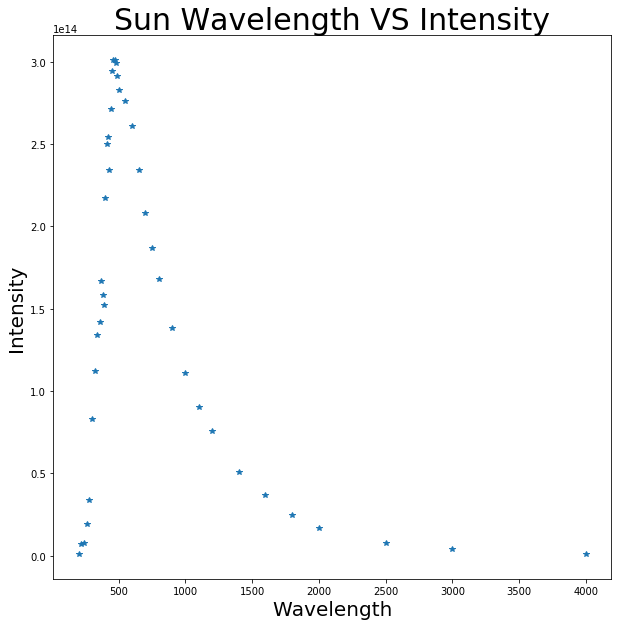

In [4]:
plt.figure(figsize=(10,10))

plt.plot(wavelength, intensity,'*')
plt.title('Sun Wavelength VS Intensity',size=30)
plt.ylabel('Intensity',size=20)
plt.xlabel('Wavelength',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

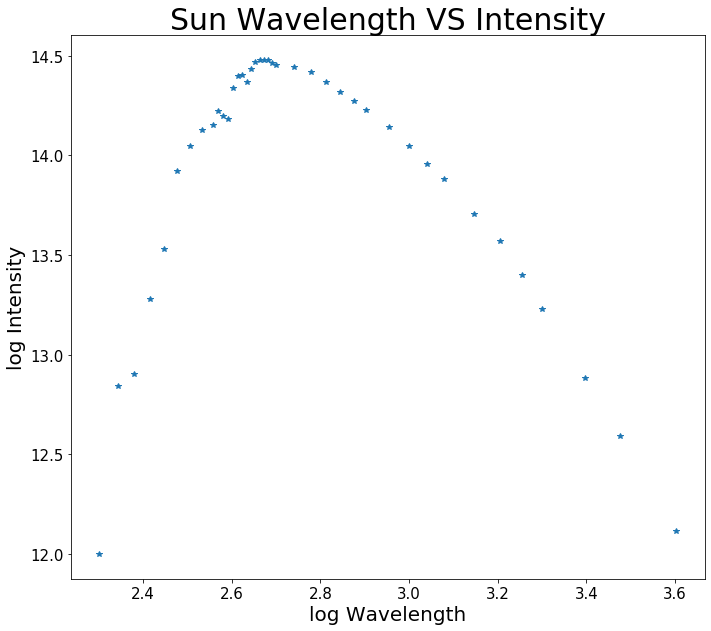

In [5]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(np.log10(wavelength), np.log10(intensity),'*')
plt.title('Sun Wavelength VS Intensity',size=30)
plt.ylabel('log Intensity',size=20)
plt.xlabel('log Wavelength',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

In [6]:
# Temperature, in K
temp = np.arange(4000, 9000, 1000) 
# Wavelength array, in cm
wavelength_cm = wavelength * math.pow(10, -7)

In [7]:
Temp, Wave = np.meshgrid(temp,wavelength_cm) 

In [8]:
# Planck's constant, in erg sec
h = 6.626 * math.pow(10, -27)
# Boltzmann's constant, in erg/K
k = 1.381 * math.pow(10, -16)
# Speed of light, cm/sec
c = 2.998 * math.pow(10, 10)

c1 = 2*h*math.pow(c,2)
λ5 = np.power(Wave, 5)
exp = np.exp((h*c)/(Wave*k*temp)) - 1
planck = (c1/λ5) * (1/exp)

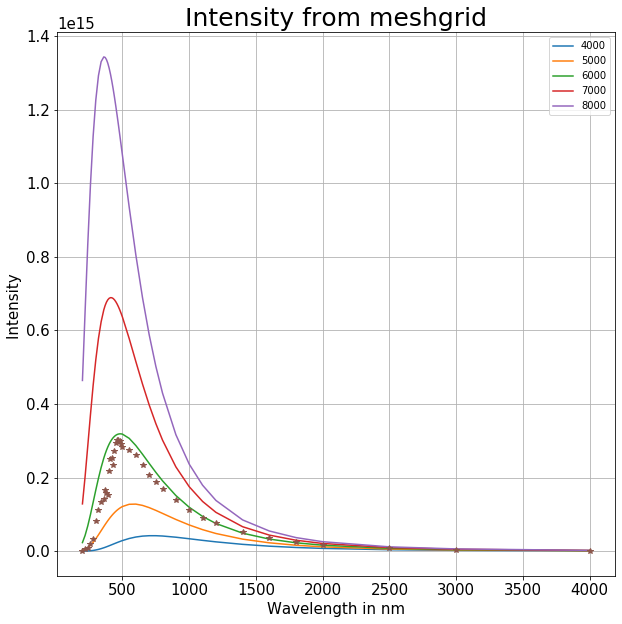

In [9]:
plt.figure(figsize=(10,10))
plt.plot(wavelength, planck,'-', markersize = 15)
plt.plot(wavelength, intensity,'*')
plt.ylabel("Intensity ", size=15)
plt.xlabel("Wavelength in nm",size=15)
plt.title('Intensity from meshgrid', size = 25)
plt.grid()

labels = (temp)
plt.legend(labels)

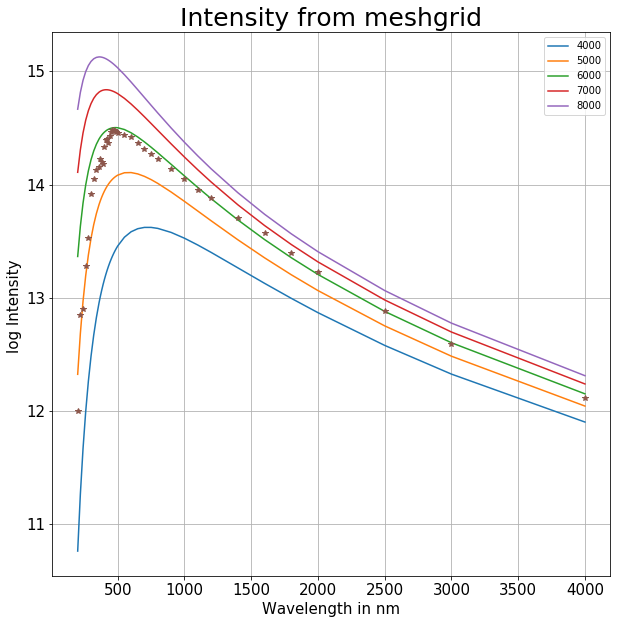

In [10]:
plt.figure(figsize=(10,10))
plt.plot(wavelength, np.log10(planck),'-', markersize = 15)
plt.plot(wavelength, np.log10(intensity),'*')
plt.ylabel("log Intensity ", size=15)
plt.xlabel("Wavelength in nm",size=15)
plt.title('Intensity from meshgrid', size = 25)
plt.grid()

labels = (temp)
plt.legend(labels)

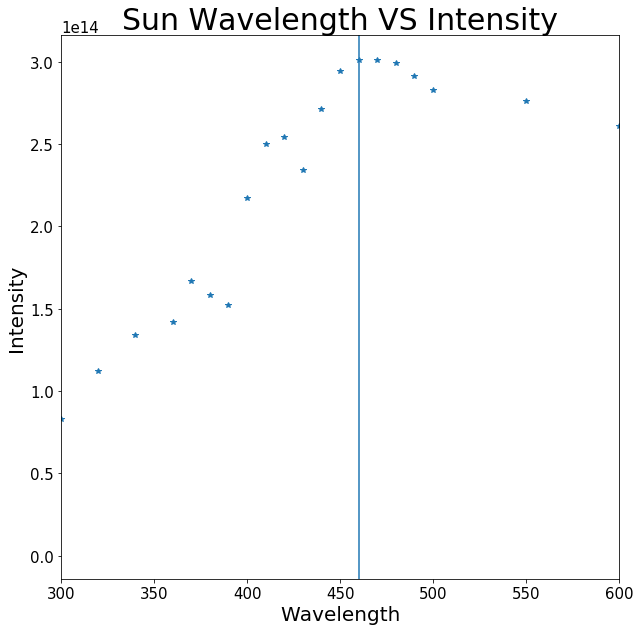

In [11]:
# Wien Temperature
constant = 2.9 * math.pow(10, 6) # nmK
plt.figure(figsize=(10,10))
plt.plot(wavelength, intensity,'*')
plt.title('Sun Wavelength VS Intensity',size=30)
plt.ylabel('Intensity',size=20)
plt.xlabel('Wavelength',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.xlim(300, 600)
plt.axvline(wavelength[18])

In [12]:
maxvalue = 0
index = 0
for x in range(len(intensity)):
    if (intensity[x] > maxvalue):
        maxvalue = intensity[x]
        index = x

print(wavelength[18])
max_wavelength = wavelength[18]

460.0


In [13]:
temp_wien = round(constant / max_wavelength)
print(temp_wien)

6304.0


In [14]:
# Color temp
bv_wave = np.array([440,550])
temp_whole_range = np.arange(2000, 20000, 500) 
bv_wave_cm = bv_wave * math.pow(10, -7)
Temp, Wave = np.meshgrid(temp_whole_range,bv_wave_cm) 

c1 = 2*h*math.pow(c,2)
λ5 = np.power(Wave, 5)
exp = np.exp((h*c)/(Wave*k*Temp)) - 1
planck = (c1/λ5) * (1/exp)

Bbv = planck[0]/planck[1]
Sbv = intensity[np.where(wavelength==440)] / intensity[np.where(wavelength==550)]
temp_color = np.interp(Sbv, Bbv, temp_whole_range)
print(temp_color)

[5809.34236939]


In [15]:
# Effective Color
solar_constant = 1.36 * math.pow(10, 3) # W/m^2
sun_distance = 1.50 * math.pow(10, 11) # m
sun_luminosity = 4 * math.pi * math.pow(sun_distance, 2) * solar_constant # W
#print(sun_luminosity)

In [16]:
sun_angle = 9.28 * math.pow(10, -3) # radians
sun_radius = 1/2 * sun_angle * sun_distance # m
#print(sun_radius) # m

In [17]:
sb_constant = 5.67 * math.pow(10, -8) # W m^-2 K^-4
temp_eff_pow4 = sun_luminosity / (4 * math.pi * math.pow(sun_radius,2) * sb_constant)
temp_eff = round(math.sqrt(math.sqrt(temp_eff_pow4)))
print(temp_eff)

5777


In [18]:
three_temp = np.array([6304,5809,5777])
three_temp_label = np.array(["Wien Temp = 6304","Color Temp = 5809","Effective Temp = 5777"])
wavelength = sun[:,0]
wavelength_cm = wavelength * math.pow(10, -7)
Temp3, Wave3 = np.meshgrid(three_temp,wavelength_cm) 
c1_3 = 2*h*math.pow(c,2)
λ5_3 = np.power(Wave3, 5)
exp_3 = np.exp((h*c)/(Wave3*k*Temp3)) - 1
planck_3 = (c1_3/λ5_3) * (1/exp_3)

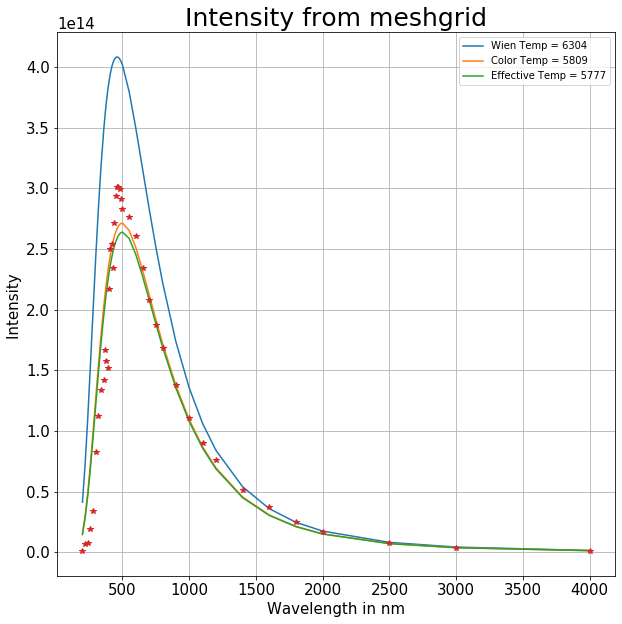

In [19]:
plt.figure(figsize=(10,10))
plt.plot(wavelength, planck_3,'-', markersize = 15)
plt.plot(wavelength, intensity,'*')
plt.ylabel("Intensity ", size=15)
plt.xlabel("Wavelength in nm",size=15)
plt.title('Intensity from meshgrid', size = 25)
plt.grid()

labels = (three_temp_label)
plt.legend(labels)